# Correlación

In [1]:
import pandas as pd
import numpy as np

In [36]:
data_ads=pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
## correlation solo tv el numerador
data_ads["correlation_num"] = (data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [6]:
data_ads.head()

,TV,Radio,Newspaper,Sales,correlation_num
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [7]:
data_ads["corr1"] = (data_ads["TV"]-np.mean(data_ads["TV"]))**2

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales,correlation_num,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [9]:
data_ads["corr2"]=(data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,correlation_num,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [11]:
corr_pearson=sum(data_ads["correlation_num"])/np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))

In [12]:
corr_pearson

0.782224424861606

Efectivamente mientras más aumenta el costo de tv aumentan las ventas, si hay relacion entre estas variables

In [20]:
def corr_coeff(df,var1,var2):
    df["num_corr"] = (df[var1]-np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    df["den1_corr"] = (df[var1]-np.mean(df[var1]))**2
    df["den2_corr"] = (df[var2]-np.mean(df[var2]))**2
    corr_pearson=sum(df["num_corr"])/np.sqrt(sum(df["den1_corr"])*sum(df["den2_corr"]))
    return corr_pearson

In [22]:
#corr_coeff(data_ads,"TV","Sales")

In [25]:
cols = data_ads.columns.values

In [26]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [27]:
for x in cols:
    for y in cols:
        print( x + ", " + y + ":" + str(corr_coeff(data_ads,x,y)))

TV, TV:1.0
TV, Radio:0.05480866446583009
TV, Newspaper:0.056647874965056993
TV, Sales:0.782224424861606
Radio, TV:0.05480866446583009
Radio, Radio:1.0
Radio, Newspaper:0.3541037507611752
Radio, Sales:0.5762225745710553
Newspaper, TV:0.056647874965056993
Newspaper, Radio:0.3541037507611752
Newspaper, Newspaper:1.0
Newspaper, Sales:0.22829902637616525
Sales, TV:0.782224424861606
Sales, Radio:0.5762225745710553
Sales, Newspaper:0.22829902637616525
Sales, Sales:1.0


In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gastos en TV vs Ventas del Producto')

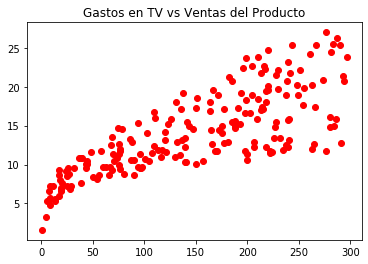

In [30]:
plt.plot(data_ads["TV"],data_ads["Sales"],"ro")
plt.title("Gastos en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gastos en Radio vs Ventas del Producto')

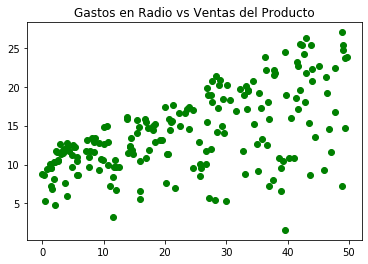

In [33]:
plt.plot(data_ads["Radio"],data_ads["Sales"],"go")
plt.title("Gastos en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gastos en periodico vs Ventas del Producto')

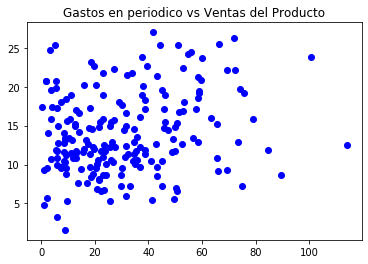

In [34]:
plt.plot(data_ads["Newspaper"],data_ads["Sales"],"bo")
plt.title("Gastos en periodico vs Ventas del Producto")

A pesar de que hemos realizado "a mano" el calculo de las correlaciones, pandas tiene la funcion implementada 

In [37]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


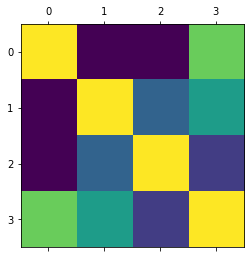

In [38]:
plt.matshow(data_ads.corr())

Podemos representar la matriz de correlación mediante matshow(), luego mostrará la matriz en donde los colores más claros representan un mayor correlación y los más oscuros no presentan correlación